# Study of Income Correlated variables based on Panel Study of Income Dynamics(PSID) data from 1992 to 2012
## Content
- [Introduction](#Introduction)
- [Data Cleanning Based on Distribution Analysis](#Data-Cleanning-Based-on-Distribution-Analysis)
- [Correlation Analysis Based on Scatter Plot and Linear Regression](#Correlation-Analysis-Based-on-Scatter-Plot-and-Linear-Regression)
- [Engels Coefficient Analysis](#Engels-Coefficient-Analysis)
- [Gini Coefficient Analysis](#Gini-Coefficient-Analysis)

## Introduction

In the final project, we investigate the correlation between household-level income and our selected income shocks (interesed varaibles) separately by our cleaning PSID(Panel Study of Income Dynamics) data. In particular, we've done a lot of work in cleaning PSID raw data with R in the beginning, and explore the correlation base on the scatter plot and linear regression of PSID cleaning data. Moreover, we verify the Engels coefficient analysis and Gini coefficient analysis with our cleaning data.

As future steps after midterm report, we propose to try several models（eg. linear regression）to fit the relationship between household-level income and income shocks based on our observation. Then, we will split PSID data into three parts: testing data, cross-validation data, and training data based. Trying to achieve perfect training accuracy with the parameters in our model by PSID training data (even year of 1992-2000, and using cross-validation and grid search to evaluate our training model and select parameters with PSID cross-validation data(even years of 2002-2008). Finally, we will predict the household-level income scale and the growth of household-level income with PSID testing data(2010 & 2012) and also evaluate how well our model predict the new data.




## Data Cleanning Based on Distribution Analysis
It is important to clean data before we start to do actual analysis on it. To be specific, we first select variables that we are interested in and then do data cleaning for the selected variables one by one.

### Selecting Interesting Variables
In this section, we import necessary libraries, read raw data from csv, select data that happens after 1992. We do this selection based on year because we want to focus on data that happens not too far away. Then we select the following interesting variables that we think is closely related to one’s income.

1. house: the price of one's house
2. year: the year to conduct survey
3. rent: annual rent of a family
4. food: the money spent eating at home
5. fout: the money spent eating outside
6. hhelp: the amount of help received from the relatives/friends of the husband of this family
7. whelp: the amount of help received from the relatives/friends of the husband of this family
8. marit: marital status
9. educ: education year
10. kids: number of kids a family has
11. race: race 
12. y: total annual income of a family

In [365]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn # or alternatively plt.style.use('ggplot') for a similar look

matplotlib.rc("figure", figsize=(8,6))
matplotlib.rc("axes", labelsize=16, titlesize=16)
matplotlib.rc("xtick", labelsize=14)
matplotlib.rc("ytick", labelsize=14)
matplotlib.rc("legend", fontsize=14)
matplotlib.rc("font", size=14)

In [366]:
# read data
df = pd.read_csv('data_1968_2013_Updated.csv')

# focus on recent data
data = df[df['year']>=1992].sort_values(by=['year'])

In [367]:
# get basic information of data
print data.head()
print data.dtypes

        person  seo  year    id  pid    house  rent util     food fstmp  \
261527     641    0  1992     1    1      0.0     0    .        0     0   
20855     8615    0  1992  7341    1  90000.0     0    .  5199896     0   
115304   21823    1  1992  4021    1      0.0  2928    .     3120  1392   
115343   18943    1  1992  4020    1  70000.0     0    .     3120     0   
20843     3799    0  1992  7342    1  28000.0     0    .  5199896     0   

         ...    asset  trhf     trhw  hhelp  ohelp  unionj  unioni  whelp  \
261527   ...      310            0.0      0      0       5       0      0   
20855    ...        0            0.0      0      0       5       0      0   
115304   ...        0            0.0      0      0       1       1      0   
115343   ...        0        21600.0      0      0       0       0      0   
20843    ...        0            0.0      0      0       0       0      0   

        truncy  trunca  
261527       0       0  
20855        0       0  
115304     

In [368]:
# select interesting variables
data = data[['id','person','year','house','rent','food','fout','hhelp','whelp','marit','educ','kids','race', 'y', 'state', 'ncars', 'age', 'fsize']]
data['income']= data['y']
del data['y']
print data.columns.values

['id' 'person' 'year' 'house' 'rent' 'food' 'fout' 'hhelp' 'whelp' 'marit'
 'educ' 'kids' 'race' 'state' 'ncars' 'age' 'fsize' 'income']


In [369]:
# remove . and space in data
data = data.replace('', np.nan)
data = data.replace('.', np.nan)
data = data.dropna(how = "any")

### Data Cleaning for Interesting Variables
Having selected interesting variables, we clean the values for them one by one. Generally speaking three aspects are involved here. First is type conversion, where it is necessary to convert string to integer or float. Second is outlier(abnormal value) removal. We adopt the hist graph to detect outliers and abnormal values, and remove a row if this row contains at least one abnormal value. Last but not least, we store other useful values, as of the log scale of some original value, into our dataframe for future usage.

In each of the following code cells we marked clearly what is the variable we are cleaning and why we are removing some values. Please refer to the code, comments, and hist graphs for details. 

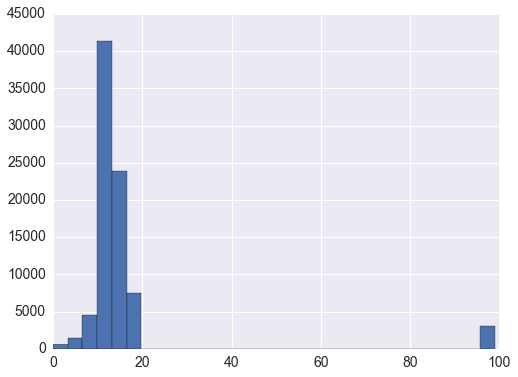

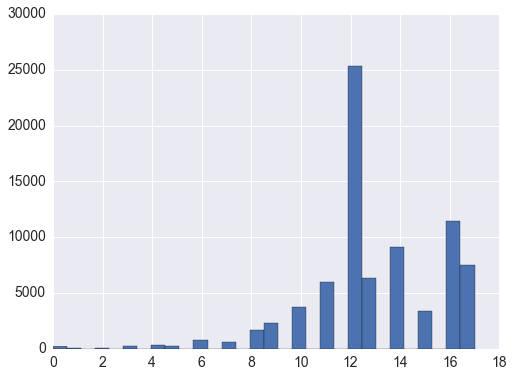

In [370]:
# clean education
plt.figure(0)
data['educ'].hist(bins = 30) #education distribution before cleaning

data = data[data['educ'] != 99]
plt.figure(1)
data['educ'].hist(bins = 30) #education distribution after cleaning

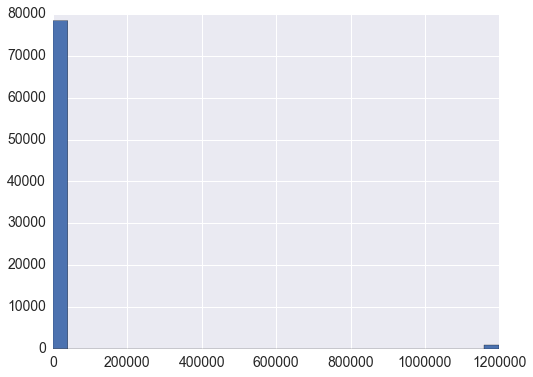

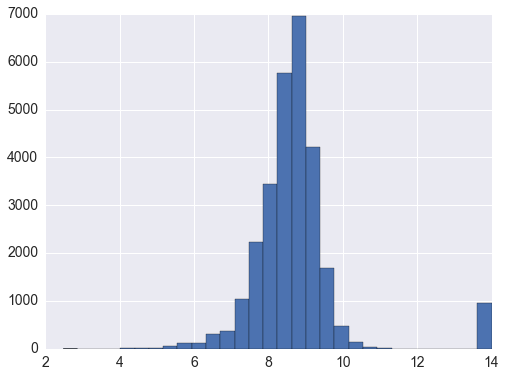

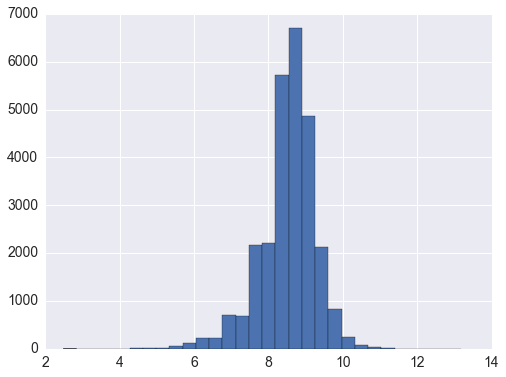

In [371]:
# clean rent: find outliers
plt.figure(0)
data['rent'] = data['rent'].astype(float) 
data['rent'].hist(bins = 30) #from this plot we start to use log scale

plt.figure(1)
rent = data['rent']
log_rent = rent[rent > 0].map(lambda x : math.log(x))
log_rent.hist(bins = 30) # rent distribution before cleaning
#print log_rent[log_rent>12]

data = data[data['rent'] < 1000000] # clean data

plt.figure(2)
rent = data['rent']
log_rent = rent[rent > 0].map(lambda x : math.log(x))
data['log_rent'] = log_rent
log_rent.hist(bins = 30) # rent distribution after cleaning

The above plot shows an interesting distribution of the rents among all the data. The people who have houses have a rent value 0, which should be ignored at this plot. However, the rest of the histogram shows that a small portion of families have a much higher rent 

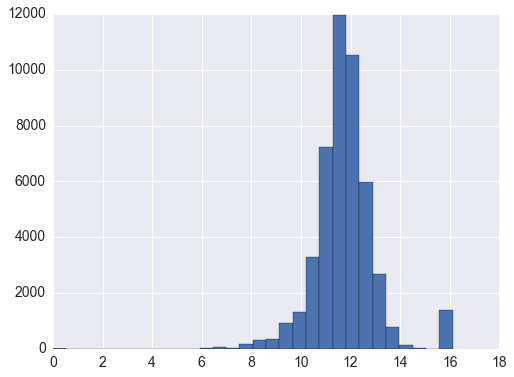

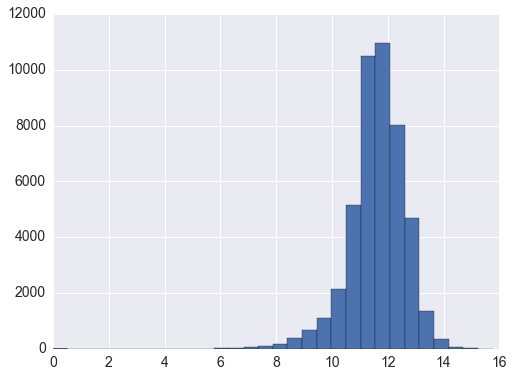

In [372]:
# clean house
plt.figure(0)
house = data['house']
log_house = house[house > 0].map(lambda x : math.log(x))
#print house[house > 8e6].head
log_house.hist(bins = 30) # house value distribution before cleaning

data = data[data['house'] < 8e6]

plt.figure(1)
house = data['house']
log_house = house[house > 0].map(lambda x : math.log(x))
log_house.hist(bins = 30) # house value distribution after cleaning

19654    5201820.0
19663    5201456.0
19671    5201196.0
19685    5200988.0
19640    5202236.0
Name: food, dtype: float64
19654    5201820.0
19663    5201456.0
19671    5201196.0
19685    5200988.0
19640    5202236.0
Name: food, dtype: float64


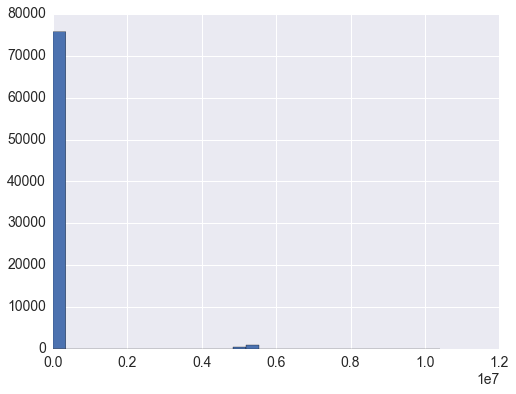

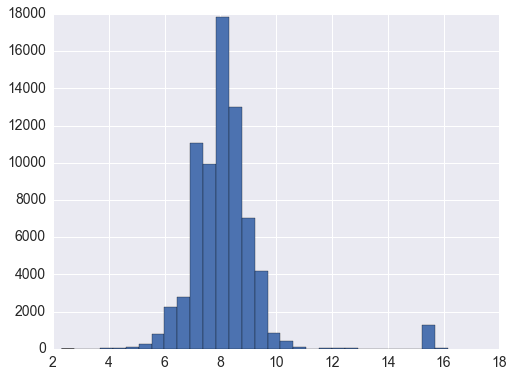

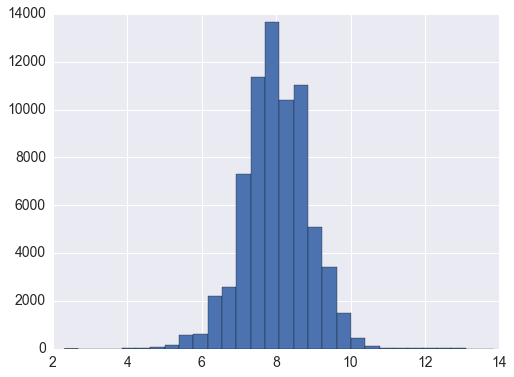

In [373]:
# clean food
data['food']= data['food'].astype(float)
plt.figure(0)
food = data['food']
print food[food > 1e6].head()
# Because all the food consumption are distinct, we assume they are reasonble large data.

food.hist(bins = 30) # food distribution before cleaning
log_food = food[food > 0].map(lambda x : math.log(x))
plt.figure(1)
log_food.hist(bins = 30) # food distribution after log scale
print food[food>math.exp(14)].head()
data = data[data['food']<math.exp(14)]
food = data['food']
log_food = food[food > 0].map(lambda x : math.log(x))
plt.figure(2)
log_food.hist(bins = 30) # food distribution after log scale

22476    1199976.0
23594    1199976.0
28792    1199988.0
25639    1199976.0
34656    1199976.0
Name: fout, dtype: float64


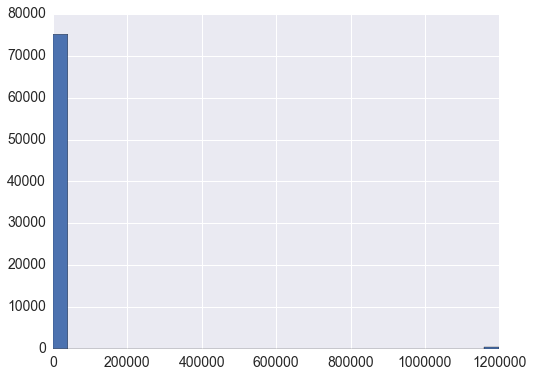

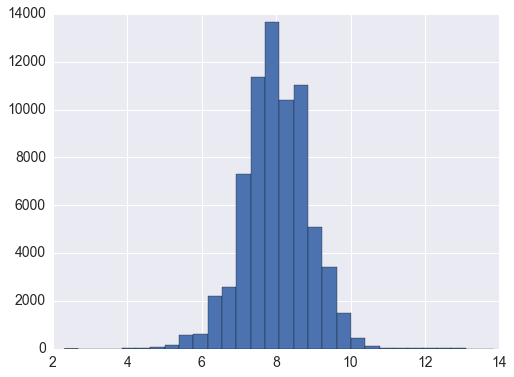

In [374]:
# clean fout(cost of delivered food)
data['fout'] = data['fout'].astype(float)
plt.figure(0)
fout = data['fout']
print fout[fout > 1e6].head()
# Because all the food consumption are almost the same, we assume they are not reasonble large data.

fout.hist(bins = 30) # fout distribution before cleaning
data = data[data['fout'] < 1e6]
fout = data['fout']
log_fout = fout[fout > 0].map(lambda x : math.log(x))
plt.figure(1)
log_food.hist(bins = 30) # food distribution after log scale

52577     999999.0
209254    999998.0
52927     999999.0
79797     999998.0
27435     999999.0
Name: hhelp, dtype: float64
25742     99998.0
119213    99998.0
149634    99999.0
113689    99998.0
109428    99998.0
Name: hhelp, dtype: float64


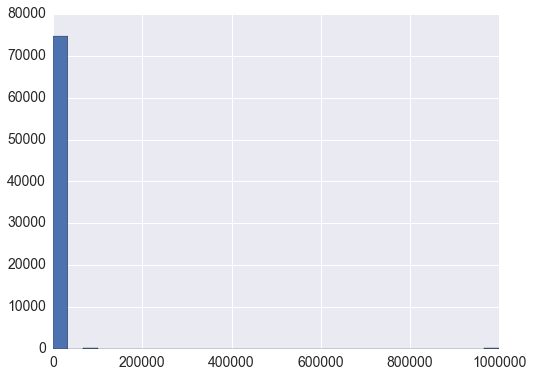

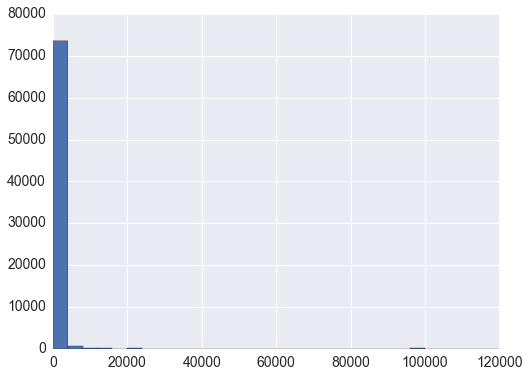

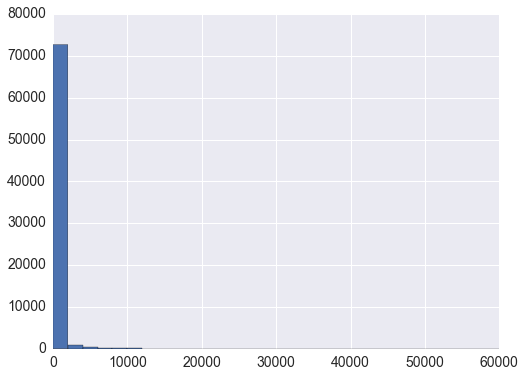

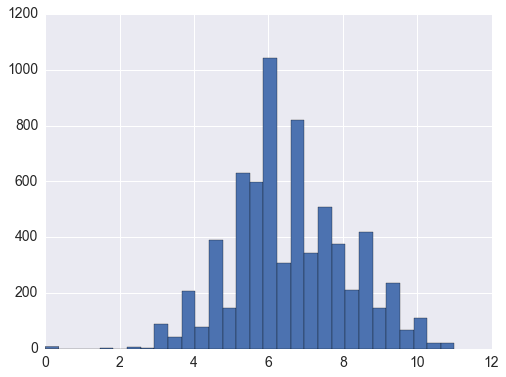

In [375]:
# clean hhelp(get help from husband)
data['hhelp'] = data['hhelp'].astype(float)
plt.figure(0)
hhelp = data['hhelp']
print hhelp[hhelp > 8e5].head()
# Because all the food consumption are almost the same, we assume they are not reasonble large data.

hhelp.hist(bins = 30) # hhelp distribution before cleaning
data = data[data['hhelp'] < 8e5]
plt.figure(1)
hhelp = data['hhelp']
hhelp.hist(bins = 30) # hhelp distribution after 1st cleaning
print hhelp[hhelp > 8e4].head()
# Because all the food consumption are almost the same, we assume they are not reasonble large data.
data = data[data['hhelp'] < 8e4]
plt.figure(2)
hhelp = data['hhelp']
hhelp.hist(bins = 30) # hhelp distribution after 2nd cleaning
log_hhelp = hhelp[hhelp > 0].map(lambda x : math.log(x))
plt.figure(3)
log_hhelp.hist(bins = 30) # hhelp distribution after log scale

224933    999999.0
35878     999998.0
64345     999998.0
155769    999998.0
117733    999999.0
Name: whelp, dtype: float64
193465    99998.0
43682     99999.0
89947     99999.0
50241     99999.0
200200    99999.0
Name: whelp, dtype: float64
162895    40000.0
32566     40000.0
31320     40000.0
30683     54217.0
157089    80000.0
Name: whelp, dtype: float64


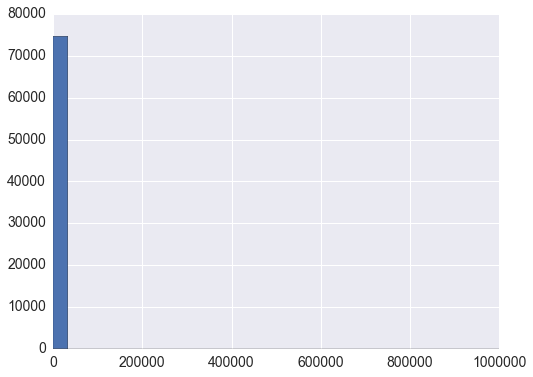

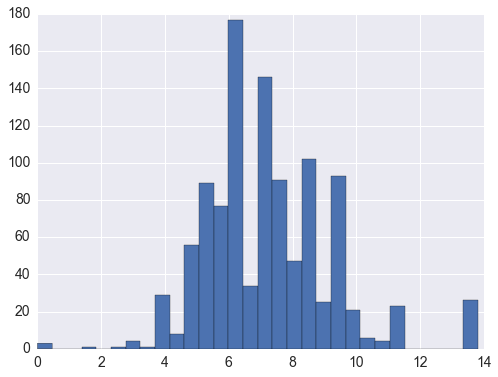

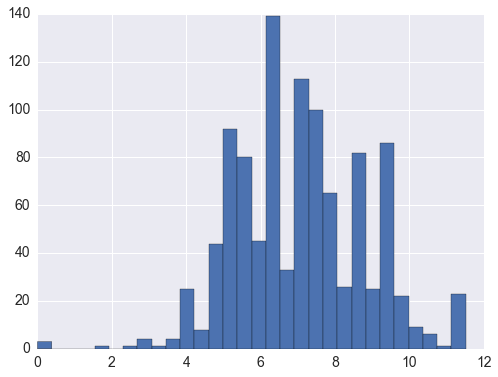

In [376]:
# clean whelp(get help from wife)
data['whelp'] = data['whelp'].astype(float)
plt.figure(0)
whelp = data['whelp']
whelp.hist(bins = 30) # whelp distribution before cleaning

log_whelp = whelp[whelp > 0].map(lambda x : math.log(x))
plt.figure(1)
log_whelp.hist(bins = 30) # whelp distribution after log scale
print whelp[whelp > math.exp(12)].head()
data = data[data['whelp'] < math.exp(12)]
whelp = data['whelp']
log_whelp = whelp[whelp > 0].map(lambda x : math.log(x))
plt.figure(2)
log_whelp.hist(bins = 30) # whelp distribution after log scale
print whelp.sort_values().tail() # Because all the whelp are almost the same, we assume they are not reasonble large data.
whelp = whelp[whelp < 99998]
print whelp.sort_values().tail() # Because all the whelp are distinct, we assume they are not reasonble large data.
data = data[data['whelp'] < 99998]

count    74702.000000
mean         0.848612
std          1.170222
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         11.000000
Name: kids, dtype: float64

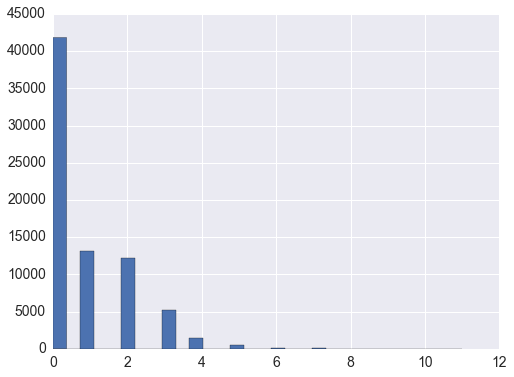

In [377]:
# clean kids
kids = data['kids']
plt.figure(0)
kids.hist(bins = 30)
kids.describe() #looks good, does not need clean

Codes for marital status
1. Married or permanently cohabiting; wife, "wife," or husband is present in the FU
2. Single, never legally married and no wife, "wife," or husband is present in the FU
3. Widowed and no wife, "wife," or husband is present in the FU
4. Divorced and no wife, "wife," or husband is present in the FU
5. Separated; legally married but no wife, "wife," or husband is present in the FU (the spouse may be in an institution)

(cited from PSID code book)

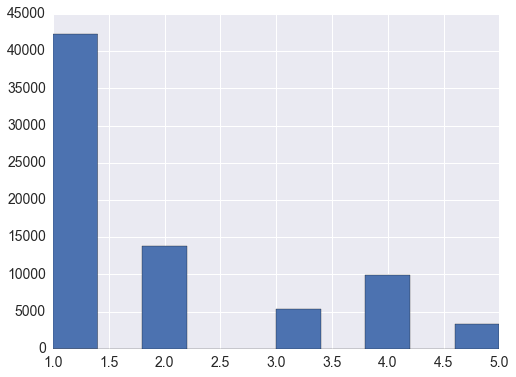

In [378]:
# clean marit
marit = data['marit']
marit.hist(bins = 10) #looks good, does not need clean

27718     1.0
40604     1.0
243371    1.0
195418    1.0
32580     1.0
Name: income, dtype: float64


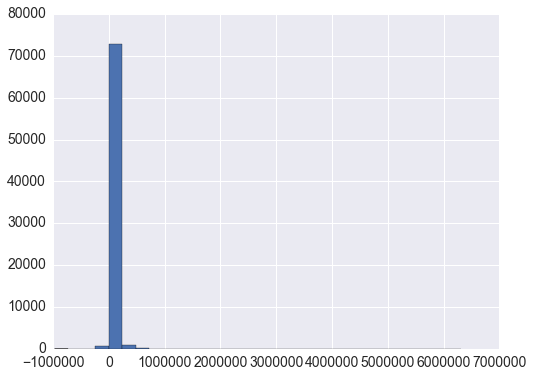

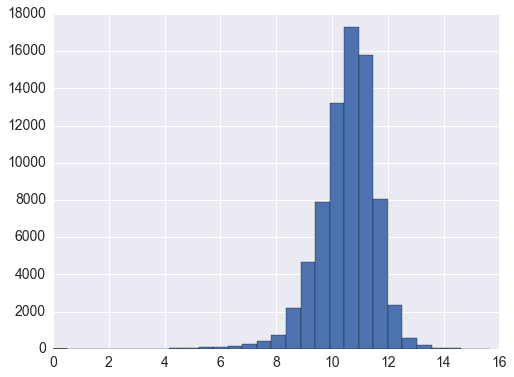

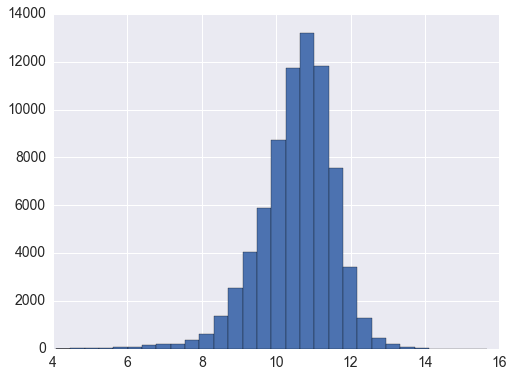

In [379]:
# clean income
income = data['income']
plt.figure(0)
income.hist(bins = 30)
#print income[income>6e6].head()
log_income = income[income > 0].map(lambda x : math.log(x))
plt.figure(1)
log_income.hist(bins = 30) # whelp distribution after log scale
print income[income>0].sort_values().head()
data = data [data['income']>math.exp(4)]
income = data['income']
log_income = income[income > 0].map(lambda x : math.log(x))
plt.figure(2)
log_income.hist(bins = 30) # whelp distribution after log scale

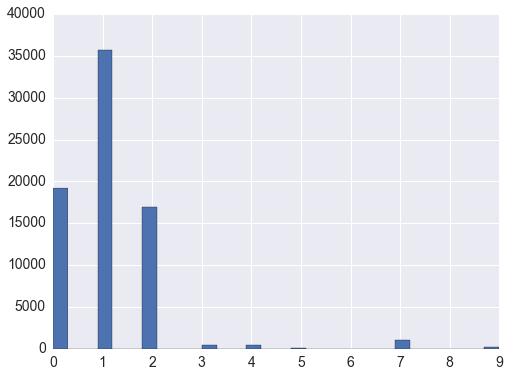

In [380]:
# clean race
race = data['race']
plt.figure(0)
race.hist(bins = 30) #looks good, do not need to clean

<a class="anchor" id="Correlation-Analysis-Based-on-Scatter-Plot-and-Linear-Regression"></a>
## Correlation Analysis Based on Scatter Plot and Correlation

From the observation of income and food columns and intuition, we started by looking at plain scatter plots.
### Income vs Food

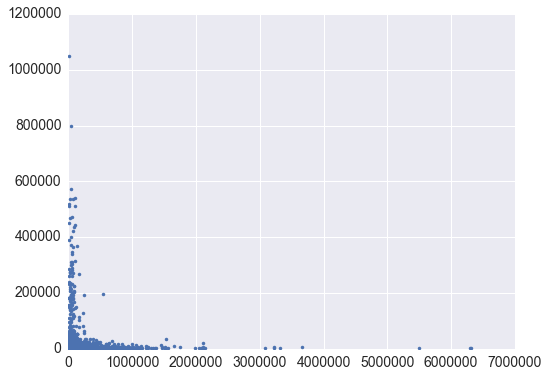

In [381]:
plt.plot(data['income'],data['food'],'.')

### Log(Income) vs Log(Food)
The plain scatter plot is not friendly to visualize. So we decide to get the logs of both income and food consumptions.
#### Correlation Comparison: Log(Income) vs Log(Food_at_home) and Log(Income) vs Log(Food_out)

            log_food  log_income
log_food    1.000000    0.038587
log_income  0.038587    1.000000
            log_fout  log_income
log_fout    1.000000    0.499353
log_income  0.499353    1.000000


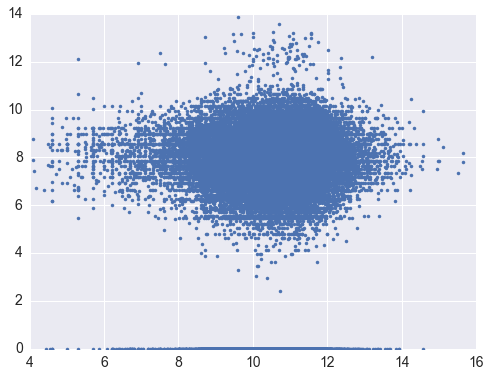

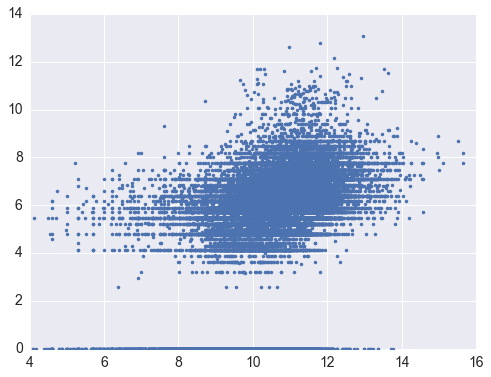

In [382]:
data['log_income'] = data['income'].map(lambda x : math.log(x))
data['log_food'] = data['food'].map(lambda x : math.log(x+1))
data['log_fout'] = data['fout'].map(lambda x : math.log(x+1))
plt.figure(0)
plt.plot(data['log_income'],data['log_food'],'.')
#corr_pd = pd.DataFrame(data['income','food'])
print data[['log_food','log_income']].corr()

print data[['log_fout','log_income']].corr()
plt.figure(1)
plt.plot(data['log_income'],data['log_fout'],'.')
plt.show()

<a class="anchor" id="Engels Coefficient Analysis"></a>
## Engels Coefficient Analysis
Engel's law is an observation in economics stating that as income rises, the proportion of income spent on food falls, even if actual expenditure on food rises. In other words, the income elasticity of demand of food is between 0 and 1.


<img src='engels.png'>

One application of this statistic is treating it as a reflection of the living standard of a country. As this proportion or "Engel coefficient" increases, the country is by nature poorer, conversely a low Engel coefficient indicates a higher standard of living.

(Cited from Wikipedia)

### Engel coefficient vs log scale income
Following plot shows a general observation that people with higher income tends to have lower engel coeffcient (spending less proportion of income on food consumption). 
- Intuition: When the income increases, the Engel coefficient should also increase (Rich people spend less proportion of their income on foods.)
- Results: The general trend is decreasing with log scale of income, which agrees with economics intuition. Noteworthy, the points aggregate a lot more at the bottom, which indiates that once the income hits and surpass a threshold line (arround 8 to 9 in log scale), both the rich and the poor have a large proportion of population that having an Engel coefficient of 0 to 0.4. In other words, once people have a decent job that could feed themselves, most population of both "work-class" and "upper-class" spend a small portion of their income on foods. The decreasing trend of food consumption proportion regarding income is noticeable.

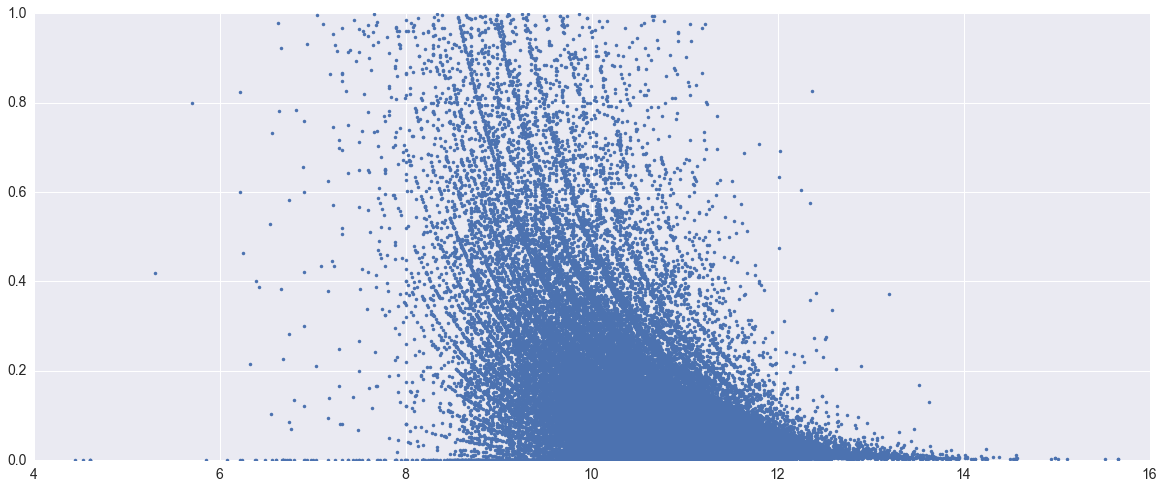

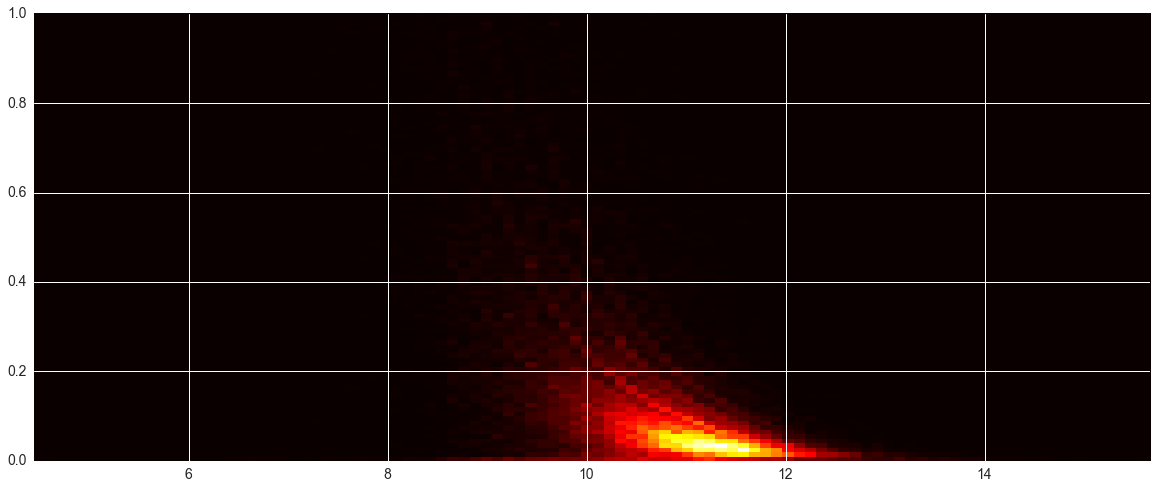

In [383]:
data_engels = data.copy(deep=True)
data_engels =data_engels[data_engels['income']>0]
data_engels = data_engels[data_engels['food']+data_engels['fout']<data_engels['income']]
def f(x):
    return float(x['fout']+x['food'])/x['income']
Engels = data_engels.apply(f, axis=1)
data_engels['log_income'] = data_engels['income'].map(lambda x : math.log(x))
plt.figure(0)
plt.figure(figsize=(20,8))
plt.plot(data_engels['log_income'],Engels,'.')
plt.figure(1)
plt.figure(figsize=(20,8))
plt.hist2d(data_engels['log_income'],Engels, bins=100);
plt.set_cmap(plt.cm.get_cmap('hot'))

<a class="anchor" id="Gini Coefficient Analysis"></a>
## Gini Coefficient Analysis
We started by looking at the whisk box charts of the income distributions from 1992 to 2012 (The survey data is collected once per two years). The log_income slightly went up and the middle part (height of the box) remained almost the same. We could not conclude too much on the distribution of income and its changes.

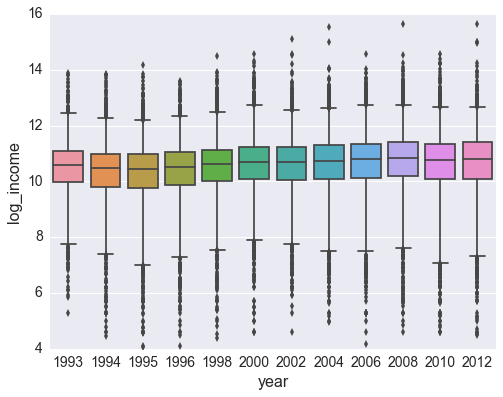

In [384]:
ax = seaborn.boxplot(x="year", y="log_income", data=data,whis=[1,99], showfliers=True)

### Concept of Gini Coefficient
To make more sense of how the income distribution changes, we introduce the concept of "Gini Coefficient".
The Gini Coefficient is one way to measure how evenly the income (or wealth) is distributed throughout a country.

The Gini Coefficient is calculated as follows. We find out the income of all the people in a country and then express this information as a cumulative percentage of people against the cumulative share of income earned. This gives us a Lorenz Curve which typically looks something like the following

<img src="Gini_coefficient.gif">

In plain English, the graph above indicates the proportion of the income going to the poorest people, middle-income people and richest people.

<img src="gini.gif">

Cited from: http://www.intmath.com/blog/mathematics/the-gini-coefficient-of-wealth-distribution-4187

### Calculation of Gini Coefficient from 1992 to 2012

Applying the gini functions to the year grouped data: 

- Intuition: The Gini coefficient should increases generally, since the gap between the rich and poor is aggregated due to the globalization and capitalization during the past 20 years.

- Results: We found the Gini Coefficient is increasing mostly during the last twenty years, which means the inequality of income is getting worse and worse.

[1993, 1994, 1995, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012]
year
1993    0.444809
1994    0.455946
1995    0.452254
1996    0.445988
1998    0.450058
2000    0.465286
2002    0.454114
2004    0.463536
2006    0.463151
2008    0.468143
2010    0.469139
2012    0.482060
Name: income, dtype: float64


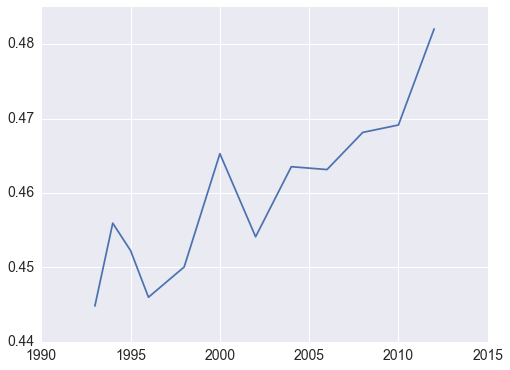

In [385]:
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area
# Cited from: http://planspace.org/2013/06/21/how-to-calculate-gini-coefficient-from-raw-data-in-python/
#print gini(data[data['year']==1992.0]['income'])
data_gini = data.copy(deep=True)
gini = data_gini.groupby("year").income.apply(gini)
print data_gini['year'].unique().tolist()
print gini
plt.plot(data_gini['year'].unique().tolist(),gini,'-')

In [386]:
print data.head()

         id  person  year     house  rent     food   fout  hhelp  whelp  \
24210  7082   13684  1993   25000.0   0.0  15600.0  840.0    0.0    0.0   
37875  6441   10158  1993  167000.0   0.0   7800.0  600.0    0.0    0.0   
24331  7074   13667  1993   70000.0   0.0  15600.0  720.0    0.0    0.0   
24317  7075   13664  1993  130000.0   0.0  15600.0  240.0    0.0    0.0   
39961  6358    9559  1993   85000.0   0.0   7800.0  360.0    0.0    0.0   

       marit    ...     race  state  ncars  age fsize    income  log_rent  \
24210      1    ...        1     31      1   29     2   59594.0       NaN   
37875      1    ...        1     41      1   68     2  142624.0       NaN   
24331      1    ...        1     48      1   42     4   35920.0       NaN   
24317      1    ...        1     48      1   66     2  132559.0       NaN   
39961      1    ...        1     47      1   50     3   59397.0       NaN   

       log_income  log_food  log_fout  
24210   10.995310  9.655090  6.734592  
37875 

## Linear Regression: not well-performed
Firstly, we tried linear regression package of sklearn to fit the education years, number of kids, race and marital status. Since the error rate is relatively high on both train sets and test sets. The attempts to improve the model are:
1. Dividing the data to train set (1992-2009) and test set (2010-2012).
1. Normalized inputs.
2. Create a serie of new one-hot-encoding columns to represent the discrete categorical labels that do not have mathematical meaning, such as race and marital status (each number represent a specific category, 'white', 'single', etc)
3. The income have so large variance that the linear regression calculation is no longer stable and valid.
4. After we removed one of the one-hot encoding series (they sum to 1 so they are not independent if we put them all as input), the coefficients look reasonable.
5. Tried different regularization norms, such as Lasso, Ridge and so on. The results did not differ much.
6. After trying log_income, the linear regression generates smaller error.

In [387]:
from sklearn.svm import LinearSVC, SVC
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
race_lst = data['race'].unique().tolist()
races = []
for race in race_lst:
    r = 'r_'+str(race)
    races.append(r)
    data[r] = (data['race']==race)*1.0
marit_lst = data['marit'].unique().tolist()
marits = []
for marit in marit_lst:
    m = 'm_'+str(marit)
    marits.append(m)
    data[m] = (data['marit']==marit)*1.0
educ_min = data['educ'].min()
educ_max = data['educ'].max()
def normalize_e(x):
    return float(x-educ_min)/(educ_max-educ_min)
data['e'] = data['educ'].apply(normalize_e)
kids_min = data['kids'].min()
kids_max = data['kids'].max()
def normalize_k(x):
    return float(x-kids_min)/(kids_max-kids_min)
data['k'] = data['kids'].apply(normalize_k)
income_min = data['income'].min()
income_max = data['income'].max()
def normalize_i(x):
    return float(x-income_min)/(income_max-income_min)
data['i'] = data['income'].apply(normalize_i)
features =['e','k']+races[:len(races)-1]+marits[:len(marits)-1]
train = data[data['year']<2010][features]
train_income = data[data['year']<2010]['log_income']
regr = linear_model.LinearRegression(normalize=True)

train = train.as_matrix()
train_income = train_income.as_matrix()

regr.fit(train, train_income)
# print features
test = data[data['year']>=2010][features]
test_income = data[data['year']>=2010]['log_income']
pred = regr.predict(test)
print 'Mean squared error of prediction on test set (2010 and after): ' + str(mean_squared_error(pred, test_income))
print 'regression coeff: ' + str(regr.coef_)

Mean squared error of prediction on test set (2010 and after): 0.691886458221
regression coeff: [ 2.23162746 -0.12787969 -0.00384762 -0.2465404  -0.07895485  0.16234375
  0.04072882 -0.15340113 -0.00928111 -0.25996917  0.81091476 -0.22201771
 -0.10156606  0.08513697]


- Intuition: 
    The regression coefficients of education should be positive (More educated, more income)
    The regression coefficients of kids number is not that clear (Rich people have more kids or less? Poor people?)
    The regression coefficients should be different for different race categories (White label might have positive correlation with income, Single label might be also positively correlated to income)
- Results:
    The first two coefficients make sense. But all the other coefficents are extremely large and have same values within same hot-encoding series. We could not understand such a large scale of coefficients of race and marital status. We conclude that the linear regression model might not be effective here since income might not be able to perfectly modeled by the attributes like race or marital status. Also some outlier data might make the calculation unstable.

In [388]:
def get_partition_bounds(data, n):
    """
    Parameters:
        data(pd.DataFrame): a data frame with "income" as the key
        n(int): number of partitions
    Return:
        (list of int): n - 1 partition bounds, if bounds[i] <= value < bounds[i + 1], then value has class label i + 1 
    """
    incomes = data['income'].tolist()
    print type(incomes)
    incomes.sort()
    # print incomes
    print len(incomes)
    bounds = []
    size = len(incomes) / n
    index = -1
    for i in range(n - 1):
        index += size
        bounds.append(incomes[index])
    print bounds
    return bounds

def get_income_label(bounds, income):
    lower = float('-inf')
    for i in range(len(bounds) + 1):
        if i >= len(bounds):
            upper = float('inf')
        else:
            upper = bounds[i]
        if lower < income and income <= upper:
            return i
        lower = upper

partition_num = 2
bounds = get_partition_bounds(data, partition_num)
data['income_label'] = data['income'].map(lambda x : get_income_label(bounds, x))

<type 'list'>
74192
[43000.0]


In [451]:
import sklearn
from sklearn.model_selection import train_test_split
import scipy


# We are going to predict income using a Naive Bayes Model:

# Gaussian Predictor for continus variables
class GaussianPredictor:
    """ Feature predictor for a normally distributed real-valued, continuous feature.
        Attributes: 
            mu (array_like) : vector containing per class mean of the feature
            sigma (array_like): vector containing per class std. deviation of the feature
    """
    # feel free to define and use any more attributes, e.g., number of classes, etc
    def __init__(self, x, y) :
        """ initializes the predictor statistics (mu, sigma) for Gaussian distribution
        Inputs:
            x (array_like): feature values (continuous)
            y (array_like): class labels (0,...,k-1)
        """
        self.k = len(y.unique())
        self.mu = np.zeros(self.k)
        self.sigma = np.zeros(self.k)
        
        for i in xrange(self.k):
            self.mu[i] = x[y==i].mean()
            self.sigma[i] = x[y==i].std()
            
    def partial_log_likelihood(self, x):
        """ log likelihood of feature values x according to each class
        Inputs:
            x (array_like): vector of feature values
        Outputs:
            (array_like): matrix of log likelihood for this feature alone
        """
        partial_likelihood = np.zeros((len(x), self.k))
        for j in xrange(len(x)):
            for i in xrange(self.k):
                partial_likelihood[j][i] = scipy.stats.norm.logpdf(x[j], self.mu[i], self.sigma[i])
        return partial_likelihood
    
# Categorical Predictor for discrete variables
class CategoricalPredictor:
    """ Feature predictor for a categorical feature.
        Attributes: 
            p (dict) : dictionary of vector containing per class probability of a feature value;
                    the keys of dictionary should exactly match the values taken by this feature
    """
    # feel free to define and use any more attributes, e.g., number of classes, etc
    def __init__(self, x, y, alpha=1) :
        """ initializes the predictor statistics (p) for Categorical distribution
        Inputs:
            x (array_like): feature values (categorical)
            y (array_like): class labels (0,...,k-1)
        """
        x_vals = x.unique()
        self.d = len(x_vals)
        self.k = len(y.unique())
        self.p = {x_val: np.zeros(self.k) for x_val in x_vals}
        for i in xrange(self.k):
            for x_val in x_vals:
                self.p[x_val][i] = (float(len(x[(y==i) & (x==x_val)])) + alpha) / (len(x[(y==i)]) + self.d * alpha)
        
    def partial_log_likelihood(self, x):
        """ log likelihood of feature values x according to each class
        Inputs:
            x (array_like): vector of feature values
        Outputs:
            (array_like): matrix of log likelihood for this feature
        """
        partial_likelihood = np.zeros((len(x), self.k))
        for j in xrange(len(x)):
            for i in xrange(self.k):
                try:
                    partial_likelihood[j, i] = self.p[x[j]][i]
                except:
                    
                    print 'x[j] = ', j
                    print x[j]
                    print self.p[x[j]]
                    print self.p[x[j]][i]
        return np.log(partial_likelihood)
    
class NaiveBayesClassifier:
    """ Naive Bayes classifier for a mixture of continuous and categorical attributes.
        We use GaussianPredictor for continuous attributes and MultinomialPredictor for categorical ones.
        Attributes:
            predictor (dict): model for P(X_i|Y) for each i
            log_prior (array_like): log P(Y)
    """
    # feel free to define and use any more attributes, e.g., number of classes, etc
    def __init__(self, df, target_label, alpha=1):
        """initializes predictors for each feature and computes class prior
        Inputs:
            df (pd.DataFrame): processed dataframe, without any missing values.
        """
        self.target_label = target_label
        cat_list = df[target_label].tolist()
        cat_dict = {}
        for cat in cat_list:
            if cat in cat_dict:
                cat_dict[cat] = cat_dict[cat] + 1
            else:
                cat_dict[cat] = 1
        self.k = len(cat_dict)
        self.log_prior = []
        for i in range(self.k):
            self.log_prior.append(math.log(float(cat_dict[i] + alpha) / (len(cat_list) + self.k * alpha)))
        self.predictor = {}
        feature_list = list(df.columns.values)
        for feature in feature_list:
            if feature != target_label:
                if str(df[feature].dtype) == 'object':
                    self.predictor[feature] = CategoricalPredictor(df[feature], df[target_label], alpha)
                else:
                    self.predictor[feature] = GaussianPredictor(df[feature], df[target_label])
    def predict(self, x, target_label):
        """ predicts label for input instances from log_prior and partial_log_likelihood of feature predictors
        Inputs:
            x (pd.DataFrame): processed dataframe, without any missing values and without class label.
        Outputs:
            (array_like): array of predicted class labels (0,..,k-1)
        """
        feature_list = list(x.columns.values)
        total = np.repeat([self.log_prior], x.shape[0], axis = 0)
        for feature in feature_list:
            if feature == target_label:
                continue
            try:
                total += self.predictor[feature].partial_log_likelihood(x[feature].values)
            except KeyError:
                #print self.predictor[feature].partial_log_likelihood(x[feature])
                print feature
                break
        return np.argmax(total, axis=1)

nb_data = pd.DataFrame()

cat_list = ['educ', 'kids', 'marit', 'race']

for cat in cat_list:
    nb_data[cat] = data[cat].map(lambda x : str(x))
    
nb_data['income_label'] = data['income_label']
nb_data['income'] = data['income']


conti_list = ['food', 'fout','house']
for conti in conti_list:
    nb_data[conti] = data[conti]
    nb_data = nb_data[nb_data[conti] > 0]

nb_data = nb_data[nb_data['income']>0]
nb_data = nb_data[nb_data['food']+nb_data['fout']<nb_data['income']]
def f(x):
    return float(x['fout']+x['food'])/x['income']
nb_data['engels'] = nb_data.apply(f, axis=1)

nb_data.drop('income', axis=1, inplace=True)

for conti in conti_list:
    nb_data[conti] = nb_data[conti].map(lambda x : math.log(x))


# We split the whole data set into training data, cross validation data, and test data using the
# ratio of 7 : 1 : 2

nb_train, nb_test = train_test_split(nb_data, test_size = 0.2, random_state = 0)
nb_train, nb_validation = train_test_split(nb_train, test_size = 0.1 / 0.8, random_state = 0)

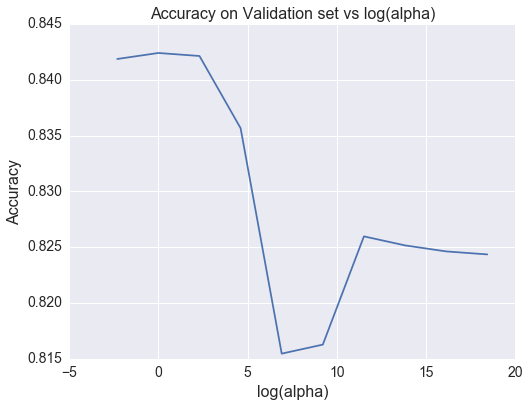

In [452]:

def get_error_from_alpha(alpha):
    nbc = NaiveBayesClassifier(nb_train, 'income_label', alpha)
    y_pred = nbc.predict(nb_validation, 'income_label')
    res = (y_pred == nb_validation['income_label'])
    return float(res.sum()) / len(res)

alphas = [1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8]
errors = []

for alpha in alphas:
    errors.append(get_error_from_alpha(alpha))
    
plt.plot(np.log(alphas), errors)
axes = plt.gca()
axes.set_xlabel('log(alpha)')
axes.set_ylabel('Accuracy')
axes.set_title('Accuracy on Validation set vs log(alpha)')
opt_alpha = alphas[np.argmax(errors)]

In [453]:
nbc = NaiveBayesClassifier(nb_train, 'income_label', opt_alpha)
y_pred = nbc.predict(nb_test, 'income_label')
res = (y_pred == nb_test['income_label'])
print 'Accuracy on test set with optimal alpha:', float(res.sum()) / len(res)

Accuracy on test set with optimal alpha: 0.824464502223


In [455]:
# neural network
nb_train.columns.values
from sklearn.neural_network import MLPClassifier
nn_train, nn_validate=nb_train,nb_validation
# nn_train, nn_validate= train_test_split(nn_data, test_size = 0.2, random_state = 0)
train_x = nn_train.as_matrix(columns = [x for x in nn_train.columns.values if x != 'income_label'])
train_y = nn_train.as_matrix(columns = ['income_label'])

validate_x = nn_validate.as_matrix(columns = [x for x in nn_validate.columns.values if x != 'income_label'])
validate_y = nn_validate.as_matrix(columns = ['income_label'])
activations = ['identity', 'logistic', 'tanh', 'relu']
for a in activations:
    max_accuracy = 0.
    for unit_per_layer in xrange(10,100,10):
        nn = MLPClassifier(hidden_layer_sizes=(unit_per_layer,),activation=a, verbose = False, tol=1e-6)
        nn.fit(train_x, train_y)
        pred = nn.predict(validate_x)
        accuracy = (validate_y == pred[:, None]).sum() * 1.0 / len(pred)
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            max_unit = unit_per_layer
        print "Accuracy with", a, "and", str(unit_per_layer), "units per layer: ", accuracy
    print "Max Accuracy with", a, "is obtained with", str(unit_per_layer), "units per layer: ", max_accuracy

Accuracy with identity and 10 units per layer:  0.874191810345
Accuracy with identity and 20 units per layer:  0.86557112069
Accuracy with identity and 30 units per layer:  0.886853448276
Accuracy with identity and 40 units per layer:  0.871767241379
Accuracy with identity and 50 units per layer:  0.86880387931
Accuracy with identity and 60 units per layer:  0.887661637931
Accuracy with identity and 70 units per layer:  0.866379310345
Accuracy with identity and 80 units per layer:  0.854256465517
Accuracy with identity and 90 units per layer:  0.864224137931
Max Accuracy with identity is obtained with 90 units per layer:  0.887661637931
Accuracy with logistic and 10 units per layer:  0.9296875
Accuracy with logistic and 20 units per layer:  0.952316810345
Accuracy with logistic and 30 units per layer:  0.932112068966
Accuracy with logistic and 40 units per layer:  0.950969827586
Accuracy with logistic and 50 units per layer:  0.942349137931
Accuracy with logistic and 60 units per layer

In [457]:
test_x = nb_test.as_matrix(columns = [x for x in nn_validate.columns.values if x != 'income_label'])
test_y = nb_test.as_matrix(columns = ['income_label'])
nn = MLPClassifier(hidden_layer_sizes=(90,),activation='relu', verbose = False, tol=1e-6)
nn.fit(train_x, train_y)
pred = nn.predict(test_x)
accuracy = (test_y == pred[:, None]).sum() * 1.0 / len(pred)
print "Accuracy with relu", "and", str(unit_per_layer), "units per layer: ", accuracy

Accuracy with relu and 90 units per layer:  0.967668058736
